In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import geopandas as gpd

# LOADING THE DATASET 

In [2]:
dataset = pd.read_csv(r"C:\Users\PRIYANSHI\Desktop\MediAlert\Healthcare Providers.csv")

In [90]:
dataset.columns

Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount', 'Charge_Payment_Ratio'],
      dtype='object')

In [3]:
dataset.head(5)

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [4]:
dataset.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [6]:
dataset.shape

(100000, 27)

In [7]:
dataset.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [8]:
dataset.drop(columns=['Street Address 2 of the Provider', 'Middle Initial of the Provider'])

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,M.D.,F,I,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,M.D.,F,I,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,DPM,M,I,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,MD,M,I,5746 N BROADWAY ST,KANSAS CITY,641183998.0,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,DO,M,I,875 MILITARY TRL,JUPITER,334585700.0,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,PT,F,I,324 E BALTIMORE ST,WILMINGTON,604811236.0,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,ARNP,F,I,645 NW 4TH ST,REDMOND,977561502.0,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,M.D.,M,I,3009 N BALLAS RD,SAINT LOUIS,631312322.0,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,F,I,2365 BOSTON POST RD,LARCHMONT,105383500.0,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [9]:
dataset.duplicated().sum()

0

In [10]:
numerical_columns = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Zip Code of the Provider',
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services'
]
for col in numerical_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Provider Demographics and Behavior


# Provider Type Distribution 

In [11]:
provider_counts = dataset['Provider Type'].value_counts()
provider_counts

Provider Type
Diagnostic Radiology                                12537
Internal Medicine                                   11366
Family Practice                                      9760
Nurse Practitioner                                   5713
Cardiology                                           4602
                                                    ...  
Certified Nurse Midwife                                 7
Radiation Therapy Center                                3
Mammography Center                                      3
Pharmacy                                                1
Advanced Heart Failure and Transplant Cardiology        1
Name: count, Length: 90, dtype: int64

In [12]:
# Identifying the most common and rare typs of providers
most_common = provider_counts.idxmax()
most_common_count = provider_counts.max()

rarest = provider_counts.idxmin()
rarest_count = provider_counts.min()

print(f"Most Common Provider Type: {most_common} ({most_common_count} providers)")
print(f"Rarest Provider Type: {rarest} ({rarest_count} providers)")

Most Common Provider Type: Diagnostic Radiology (12537 providers)
Rarest Provider Type: Pharmacy (1 providers)


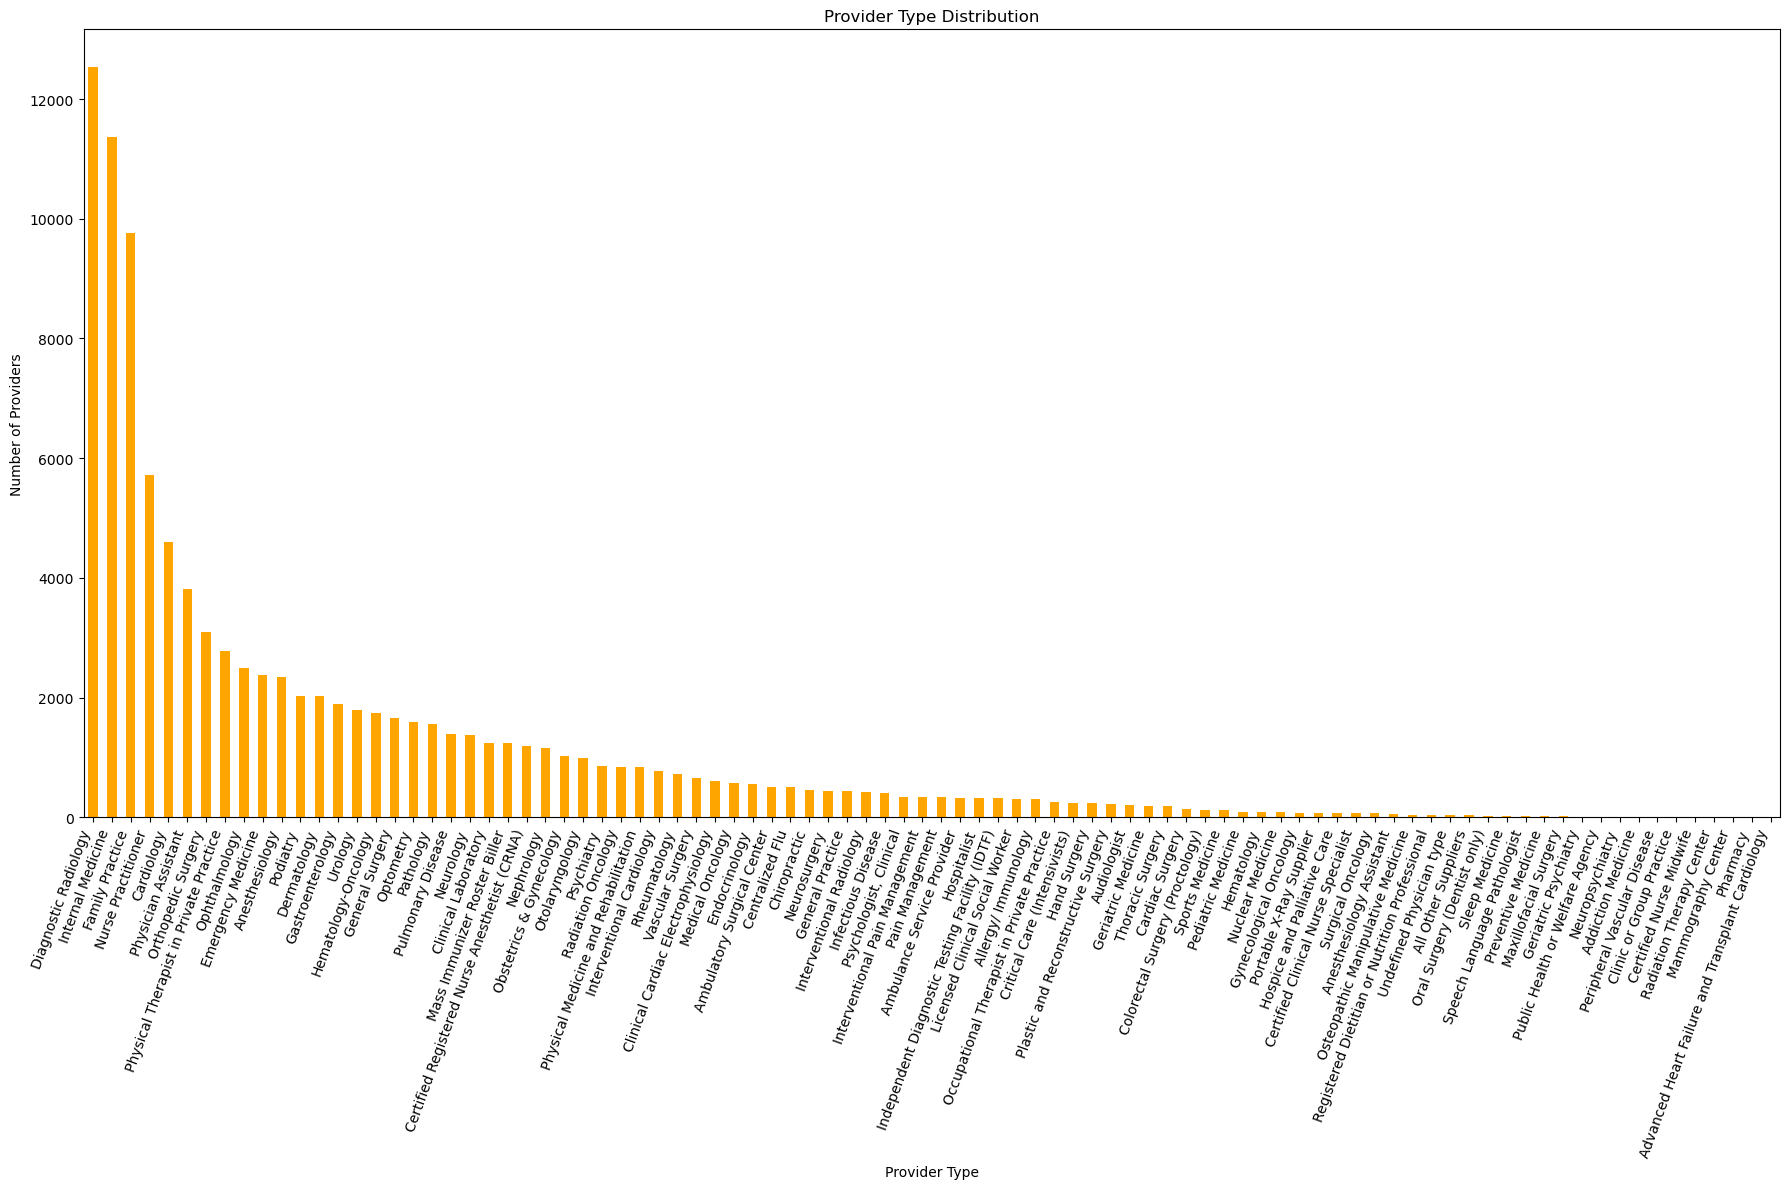

In [13]:
provider_counts.plot(kind='bar',color='orange', figsize=(18, 12))
plt.title('Provider Type Distribution')
plt.xlabel('Provider Type')
plt.ylabel('Number of Providers')
plt.xticks(rotation=70, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Gender Analysis

In [14]:
gender_counts = dataset['Gender of the Provider'].value_counts()
gender_counts

Gender of the Provider
M    66641
F    29105
Name: count, dtype: int64

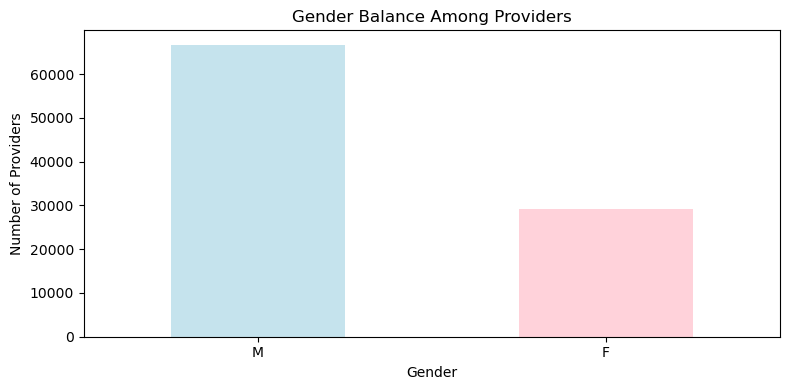

In [15]:
plt.figure(figsize=(8, 4))
gender_counts.plot(kind='bar', color=['lightblue', 'pink'], alpha=0.7)
plt.title('Gender Balance Among Providers')
plt.xlabel('Gender')
plt.ylabel('Number of Providers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

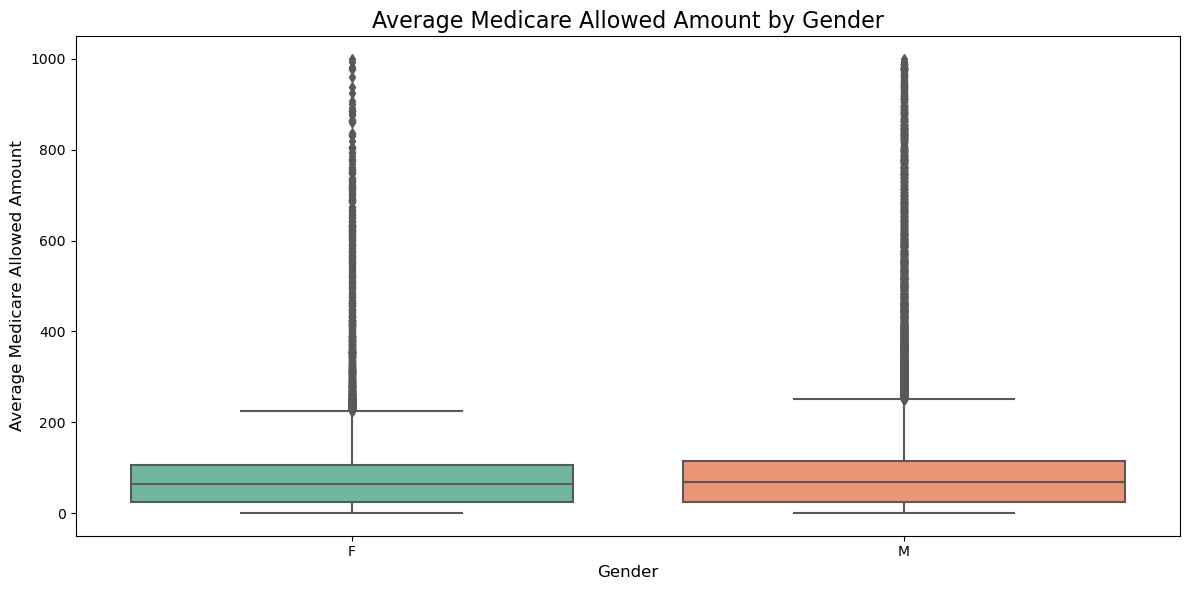

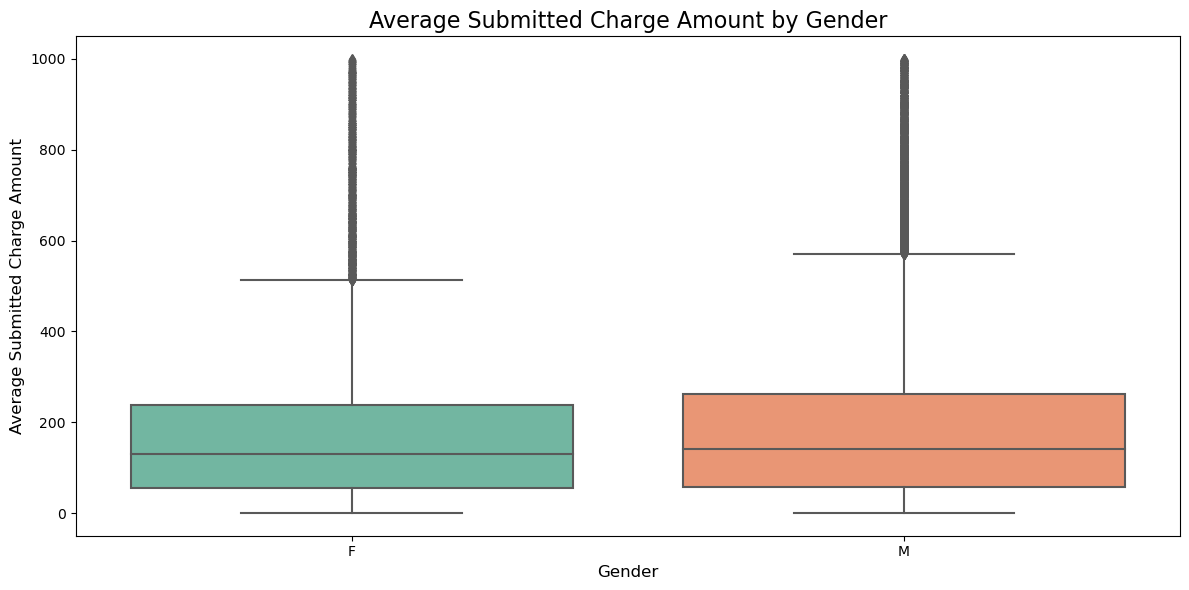

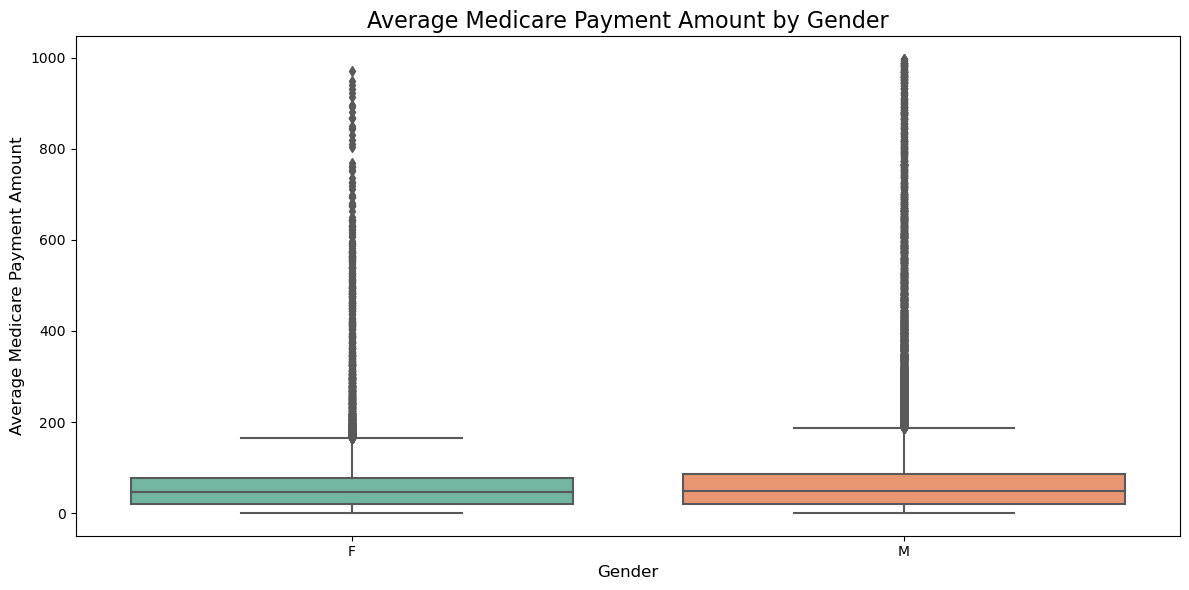

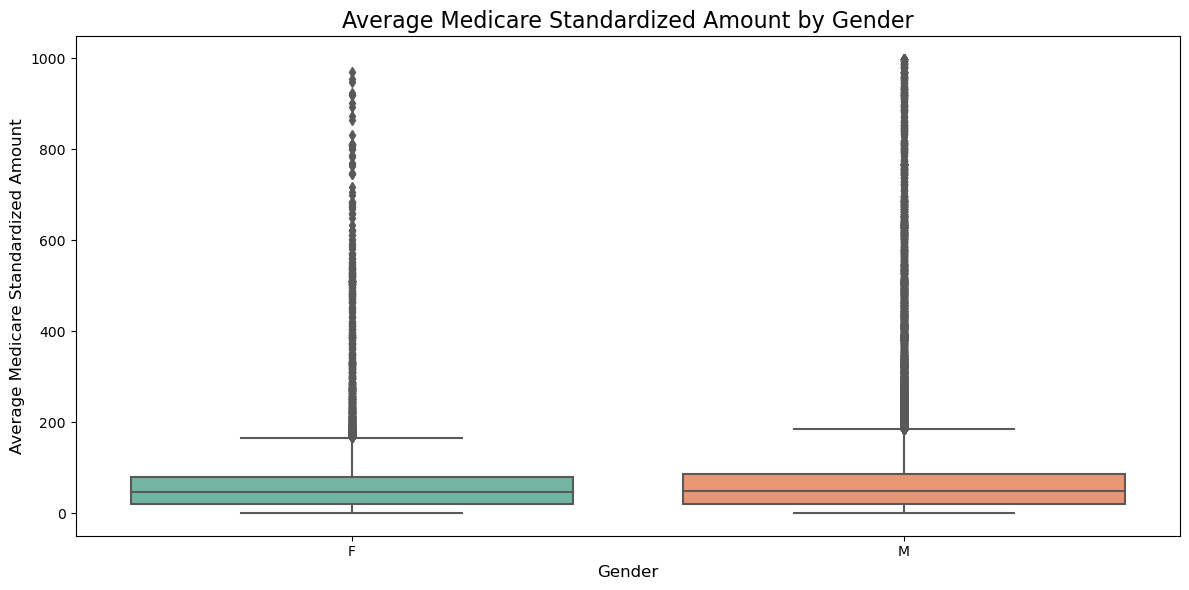

In [17]:
#Financial Metrics:
 # Average Medicare Payment Amount
 # Average Medicare Standardized Amount
 # Average Medicare Allowed Amount
 # Average Submitted Charge Amount

financial_metrics = [
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

for metric in financial_metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='Gender of the Provider',  
        y=metric,  
        data=dataset,
        palette='Set2'
    )
    plt.title(f'{metric} by Gender', fontsize=16)
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.tight_layout()
    plt.show()

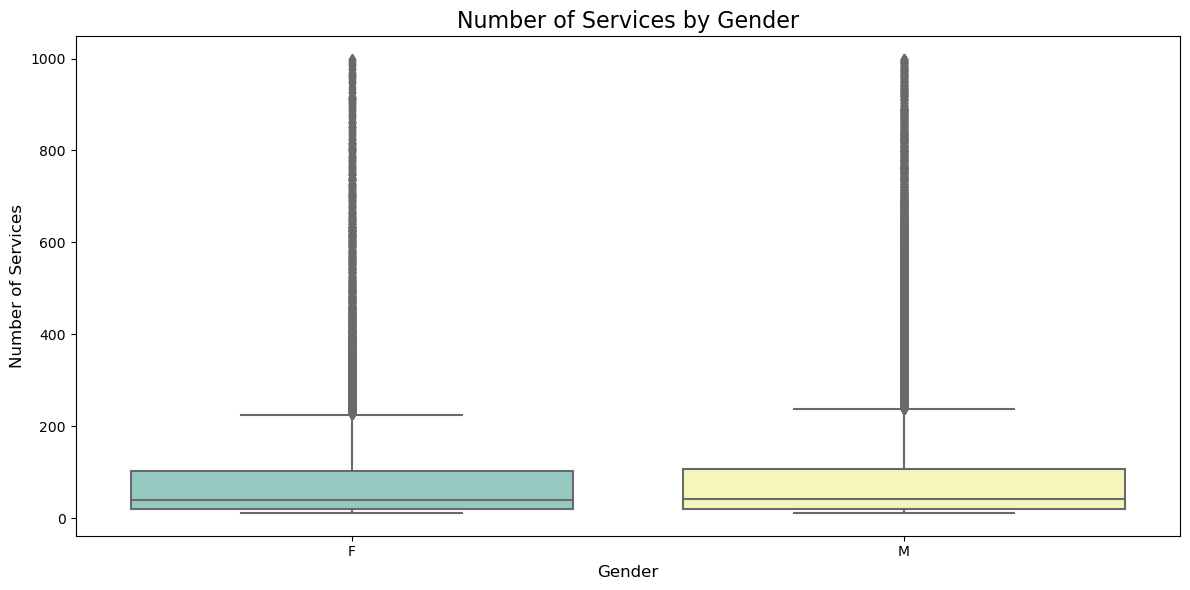

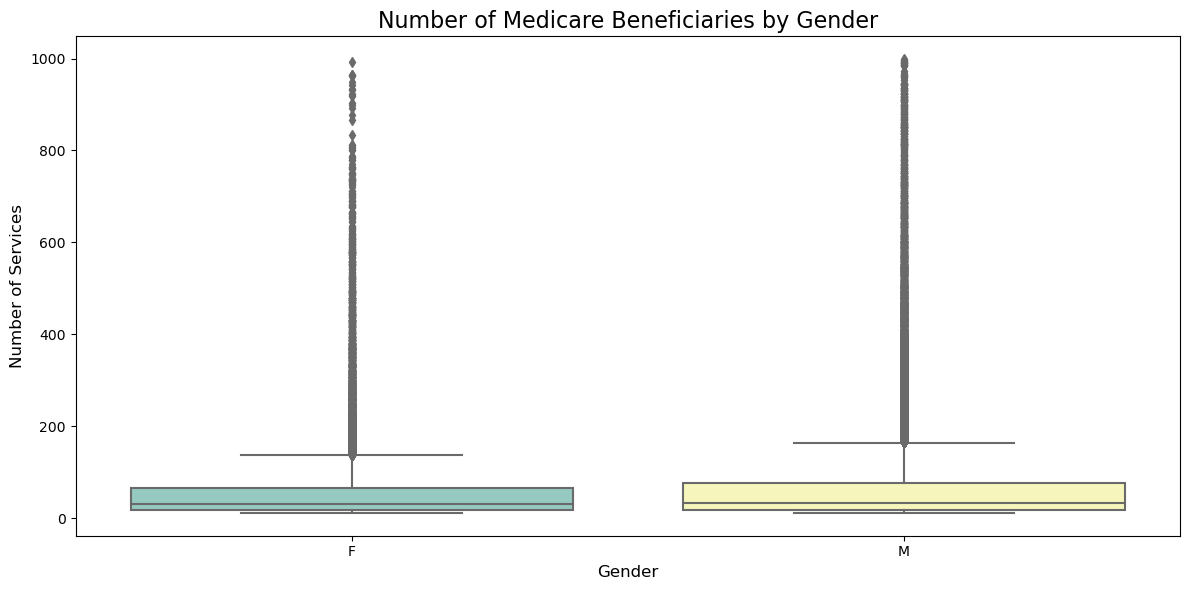

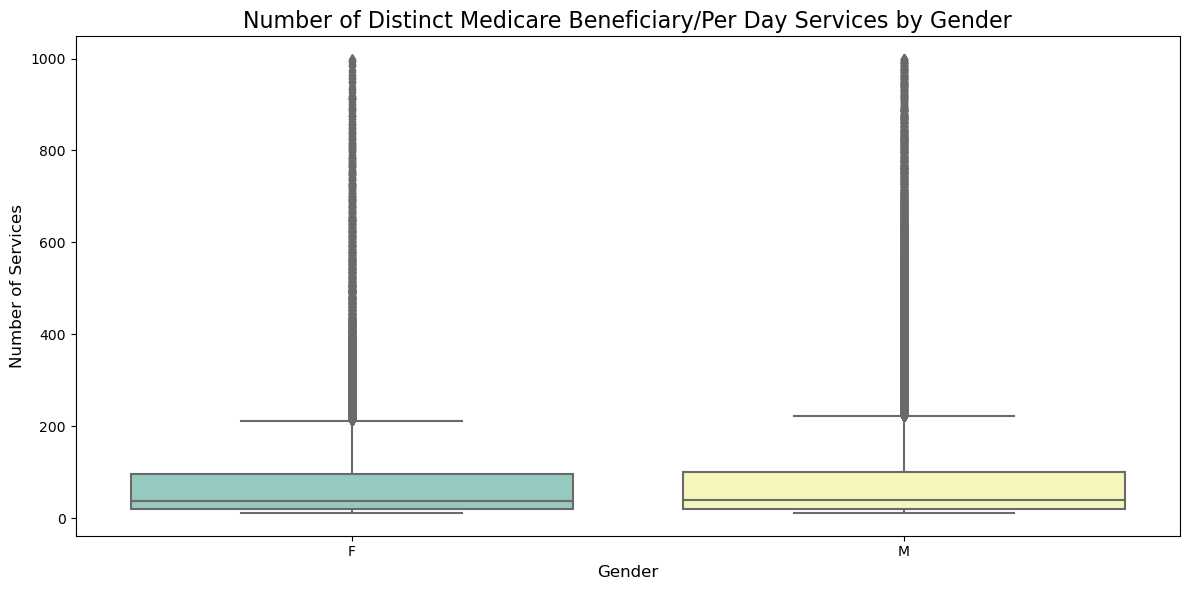

In [18]:
#Service Metrics:
 # Number of Services
 # Number of Medicare Beneficiaries
 # Number of Distinct Medicare Beneficiary/Per Day Services

service_metrics = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services']

for metric in service_metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
    x='Gender of the Provider',
    y= metric,
    data=dataset,
    palette='Set3')
    plt.title(f'{metric} by Gender', fontsize=16)
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Number of Services', fontsize=12)
    plt.tight_layout()
    plt.show()

# Geographic Insights

# State-wise Distribution

In [19]:
state_counts = dataset['State Code of the Provider'].value_counts()
most_providers_state = state_counts.idxmax()
least_providers_state = state_counts.idxmin()

print(f"State with Most Providers: {most_providers_state} ({state_counts.max()} providers)")
print(f"State with Least Providers: {least_providers_state} ({state_counts.min()} providers)")


State with Most Providers: CA (7775 providers)
State with Least Providers: AA (1 providers)


In [78]:
state_metrics = dataset.groupby('State Code of the Provider').agg({
    'National Provider Identifier': 'count',
    'Number of Services': 'sum',
    'Number of Medicare Beneficiaries': 'sum',
    'Number of Distinct Medicare Beneficiary/Per Day Services': 'mean',
    'Average Medicare Allowed Amount': 'mean',
    'Average Submitted Charge Amount': 'mean',
    'Average Medicare Payment Amount': 'mean',
    'Average Medicare Standardized Amount': 'mean'
}).round(2)
state_metrics

,National Provider Identifier,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
State Code of the Provider,,,,,,,,
AA,1,220.0,220.0,220.00,29.18,99.39,28.60,30.25
AE,2,70.0,69.0,35.00,131.40,288.00,86.63,90.15
AK,165,10887.0,6805.0,59.70,101.85,252.96,75.99,60.82
AL,1821,188203.0,132510.0,100.68,77.20,148.51,61.46,66.16
AP,3,224.0,217.0,74.67,78.31,264.03,53.07,49.18
AR,1130,110243.0,84661.0,98.20,82.37,166.12,69.95,74.93
AZ,1994,201432.0,144300.0,101.04,93.42,191.03,74.64,76.91
CA,7775,811140.3,561306.0,102.64,100.59,209.60,78.47,75.13
CO,1423,128112.3,90136.0,87.36,96.14,199.71,76.31,76.45



Top 5 States by National Provider Identifier:
                            National Provider Identifier  Number of Services  \
State Code of the Provider                                                     
CA                                                  7775            811140.3   
FL                                                  7263            757796.0   
TX                                                  6861            690230.6   
NY                                                  6361            663265.0   
PA                                                  4561            409623.1   

                            Number of Medicare Beneficiaries  \
State Code of the Provider                                     
CA                                                  561306.0   
FL                                                  560674.0   
TX                                                  484583.0   
NY                                                  449372.0   
PA      

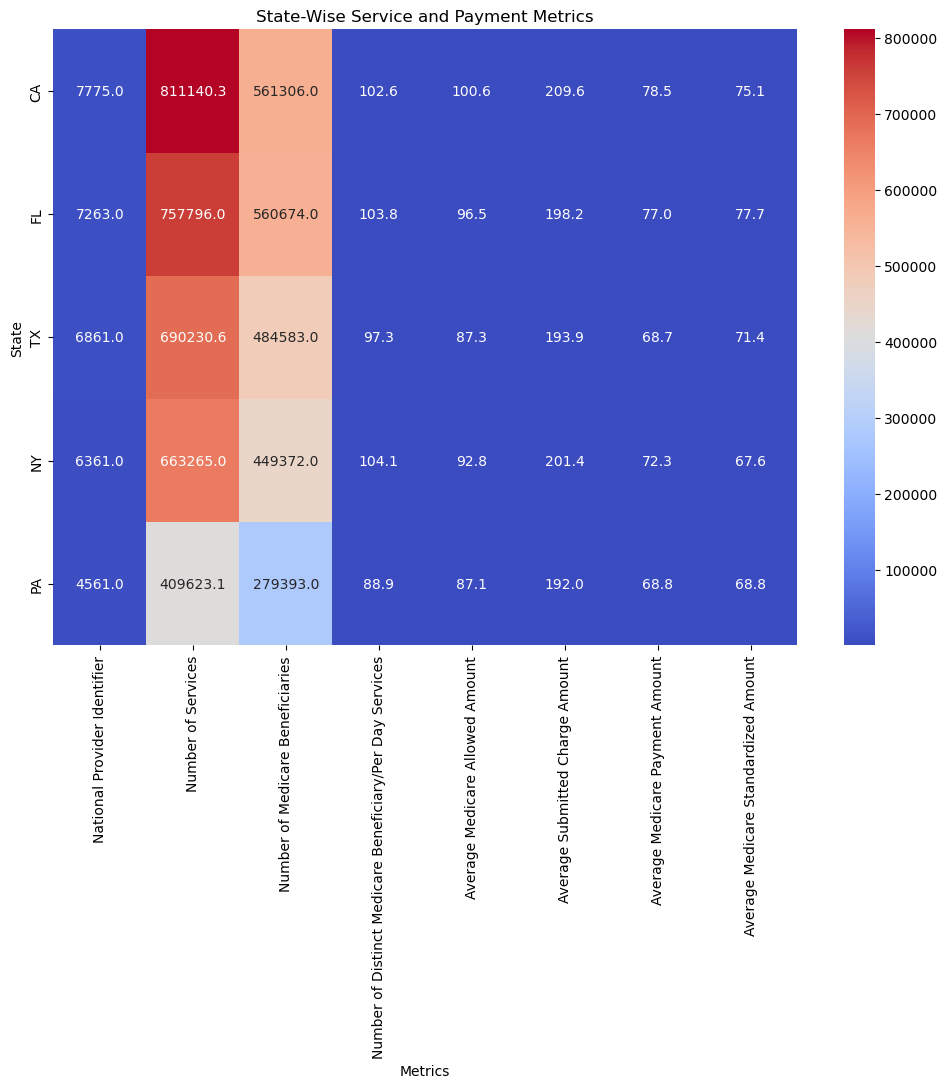

In [91]:
state_metrics = dataset.groupby('State Code of the Provider').agg({
    'National Provider Identifier': 'count',
    'Number of Services': 'sum',
    'Number of Medicare Beneficiaries': 'sum',
    'Number of Distinct Medicare Beneficiary/Per Day Services': 'mean',
    'Average Medicare Allowed Amount': 'mean',
    'Average Submitted Charge Amount': 'mean',
    'Average Medicare Payment Amount': 'mean',
    'Average Medicare Standardized Amount': 'mean'
}).round(2)

for column in state_metrics.columns:
    print(f"\nTop 5 States by {column}:")
    print(state_metrics.sort_values(by=column, ascending=False).head(5))

plt.figure(figsize=(12, 8))
state_metrics_5=state_metrics.sort_values(by='National Provider Identifier', ascending=False).head(5)
#sns.heatmap(state_metrics, cmap='coolwarm')
sns.heatmap(state_metrics_5, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('State-Wise Service and Payment Metrics')
plt.xlabel('Metrics')
plt.ylabel('State')
plt.show()

# City-wise Analysis

In [97]:
city_metrics = dataset.groupby('City of the Provider').agg({
    'National Provider Identifier': 'count',   # Count of providers
    'Number of Services': 'sum',              # Total services
    'Average Medicare Payment Amount': 'mean',  # Average payment cost
    'Average Medicare Allowed Amount': 'mean'   # Average allowed cost
}).reset_index().round(2)
city_metrics.columns = [
    'City', 
    'Provider Count', 
    'Total Services', 
    'Avg Medicare Payment Amount', 
    'Avg Medicare Allowed Amount'
]
top_cities_by_providers = city_metrics.sort_values(by='Provider Count', ascending=False).head(5)
print("Top 10 Cities by Most Active Healthcare Providers:")
print(top_cities_by_providers)

Top 10 Cities by Most Active Healthcare Providers:
              City  Provider Count  Total Services  \
3581      NEW YORK            1061         99019.0   
2337       HOUSTON             874         81474.0   
857        CHICAGO             759         70064.0   
4048  PHILADELPHIA             658         55047.0   
487         BOSTON             634         46435.0   

      Avg Medicare Payment Amount  Avg Medicare Allowed Amount  
3581                        83.73                       108.68  
2337                        74.06                        95.12  
857                         66.17                        85.41  
4048                        81.44                        97.93  
487                         78.76                       100.10  


In [99]:
# regions with unusually high/low service costs
high_cost_cities = city_metrics.sort_values(by='Avg Medicare Payment Amount', ascending=False).head(5)
low_cost_cities = city_metrics.sort_values(by='Avg Medicare Payment Amount', ascending=True).head(5)

print("\nCities with Unusually High Service Costs:")
print(high_cost_cities)

print("\nCities with Unusually Low Service Costs:")
print(low_cost_cities)


Cities with Unusually High Service Costs:
               City  Provider Count  Total Services  \
1339    E. WEYMOUTH               1            27.0   
5390   W LAKE HILLS               1            61.0   
7              ACME               1            25.0   
985   COLO. SPRINGS               1             0.0   
224     BAILEYVILLE               1            70.0   

      Avg Medicare Payment Amount  Avg Medicare Allowed Amount  
1339                       931.39                          NaN  
5390                       888.83                          NaN  
7                          845.12                       937.02  
985                        764.99                       977.49  
224                        666.40                       850.00  

Cities with Unusually Low Service Costs:
              City  Provider Count  Total Services  \
1767   FRANKENMUTH               1            17.0   
5677      WILDWOOD               1            13.0   
895     CITRONELLE              

# Financial Performance 

# Charge vs Payment Discrepancies

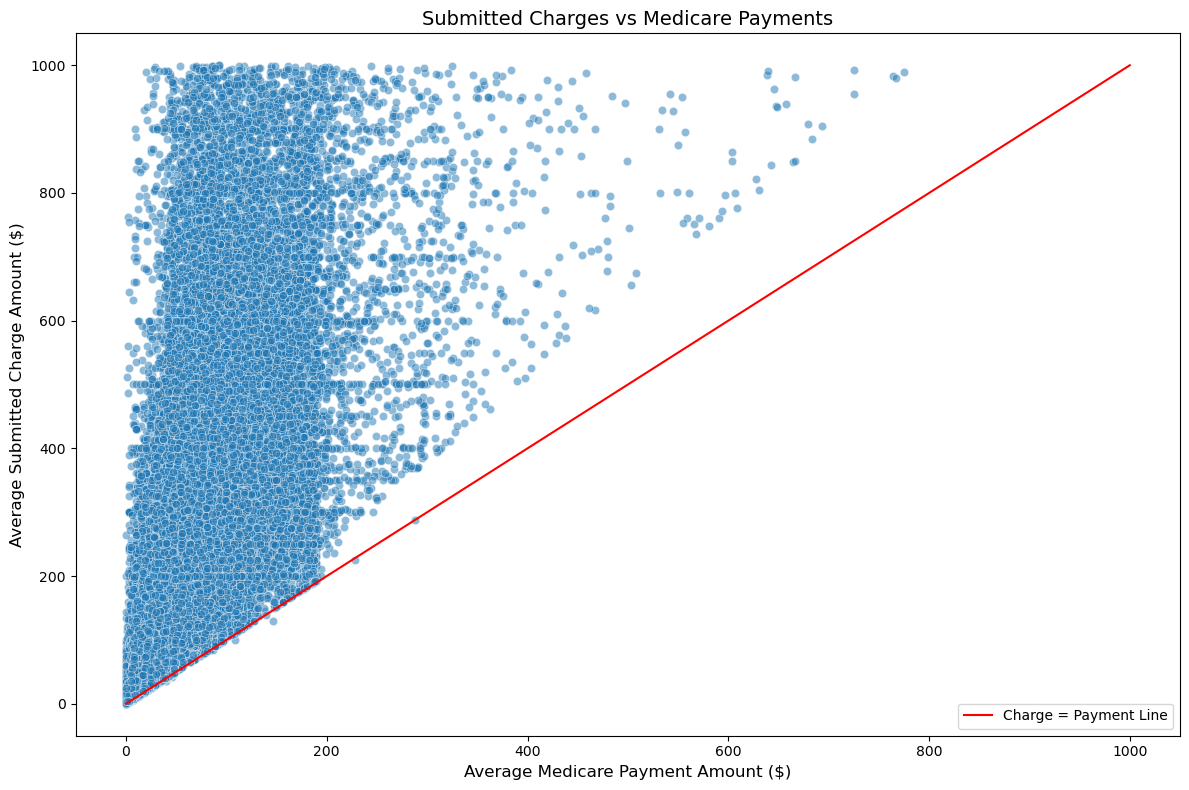

In [44]:
# Analyzing average submitted charges vs Medicare Payments 

dataset['Charge_Payment_Ratio'] = dataset['Average Submitted Charge Amount'] / dataset['Average Medicare Payment Amount']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataset,
                x='Average Medicare Payment Amount',
                y='Average Submitted Charge Amount',
                alpha=0.5)

plt.title('Submitted Charges vs Medicare Payments', fontsize=14)
plt.xlabel('Average Medicare Payment Amount ($)', fontsize=12)
plt.ylabel('Average Submitted Charge Amount ($)', fontsize=12)

max_val = max(dataset['Average Medicare Payment Amount'].max(), 
              dataset['Average Submitted Charge Amount'].max())
plt.plot([0, max_val], [0, max_val], 'r-', label='Charge = Payment Line')
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
# Providers with unusually high charge-to-payment ratios

high_ratio_threshold = dataset['Charge_Payment_Ratio'].quantile(0.95)
high_ratio_providers = dataset[dataset['Charge_Payment_Ratio'] > high_ratio_threshold]

print("\nProviders with Unusually High Charge-to-Payment Ratios (Top 5%):")
print(high_ratio_providers[['Provider Type', 'Average Submitted Charge Amount','Average Medicare Payment Amount', 'Charge_Payment_Ratio']]
      .sort_values('Charge_Payment_Ratio', ascending=False).head(5))


Providers with Unusually High Charge-to-Payment Ratios (Top 5%):
            Provider Type  Average Submitted Charge Amount  \
50498             Urology                        49.700000   
33572  Nurse Practitioner                       200.000000   
88188  Nurse Practitioner                        30.000000   
79093     Family Practice                       144.461818   
76723      Anesthesiology                        15.000000   

       Average Medicare Payment Amount  Charge_Payment_Ratio  
50498                         0.018571           2676.153842  
33572                         0.091833           2177.858440  
88188                         0.018718           1602.739728  
79093                         0.130909           1103.527778  
76723                         0.014615           1026.315791  


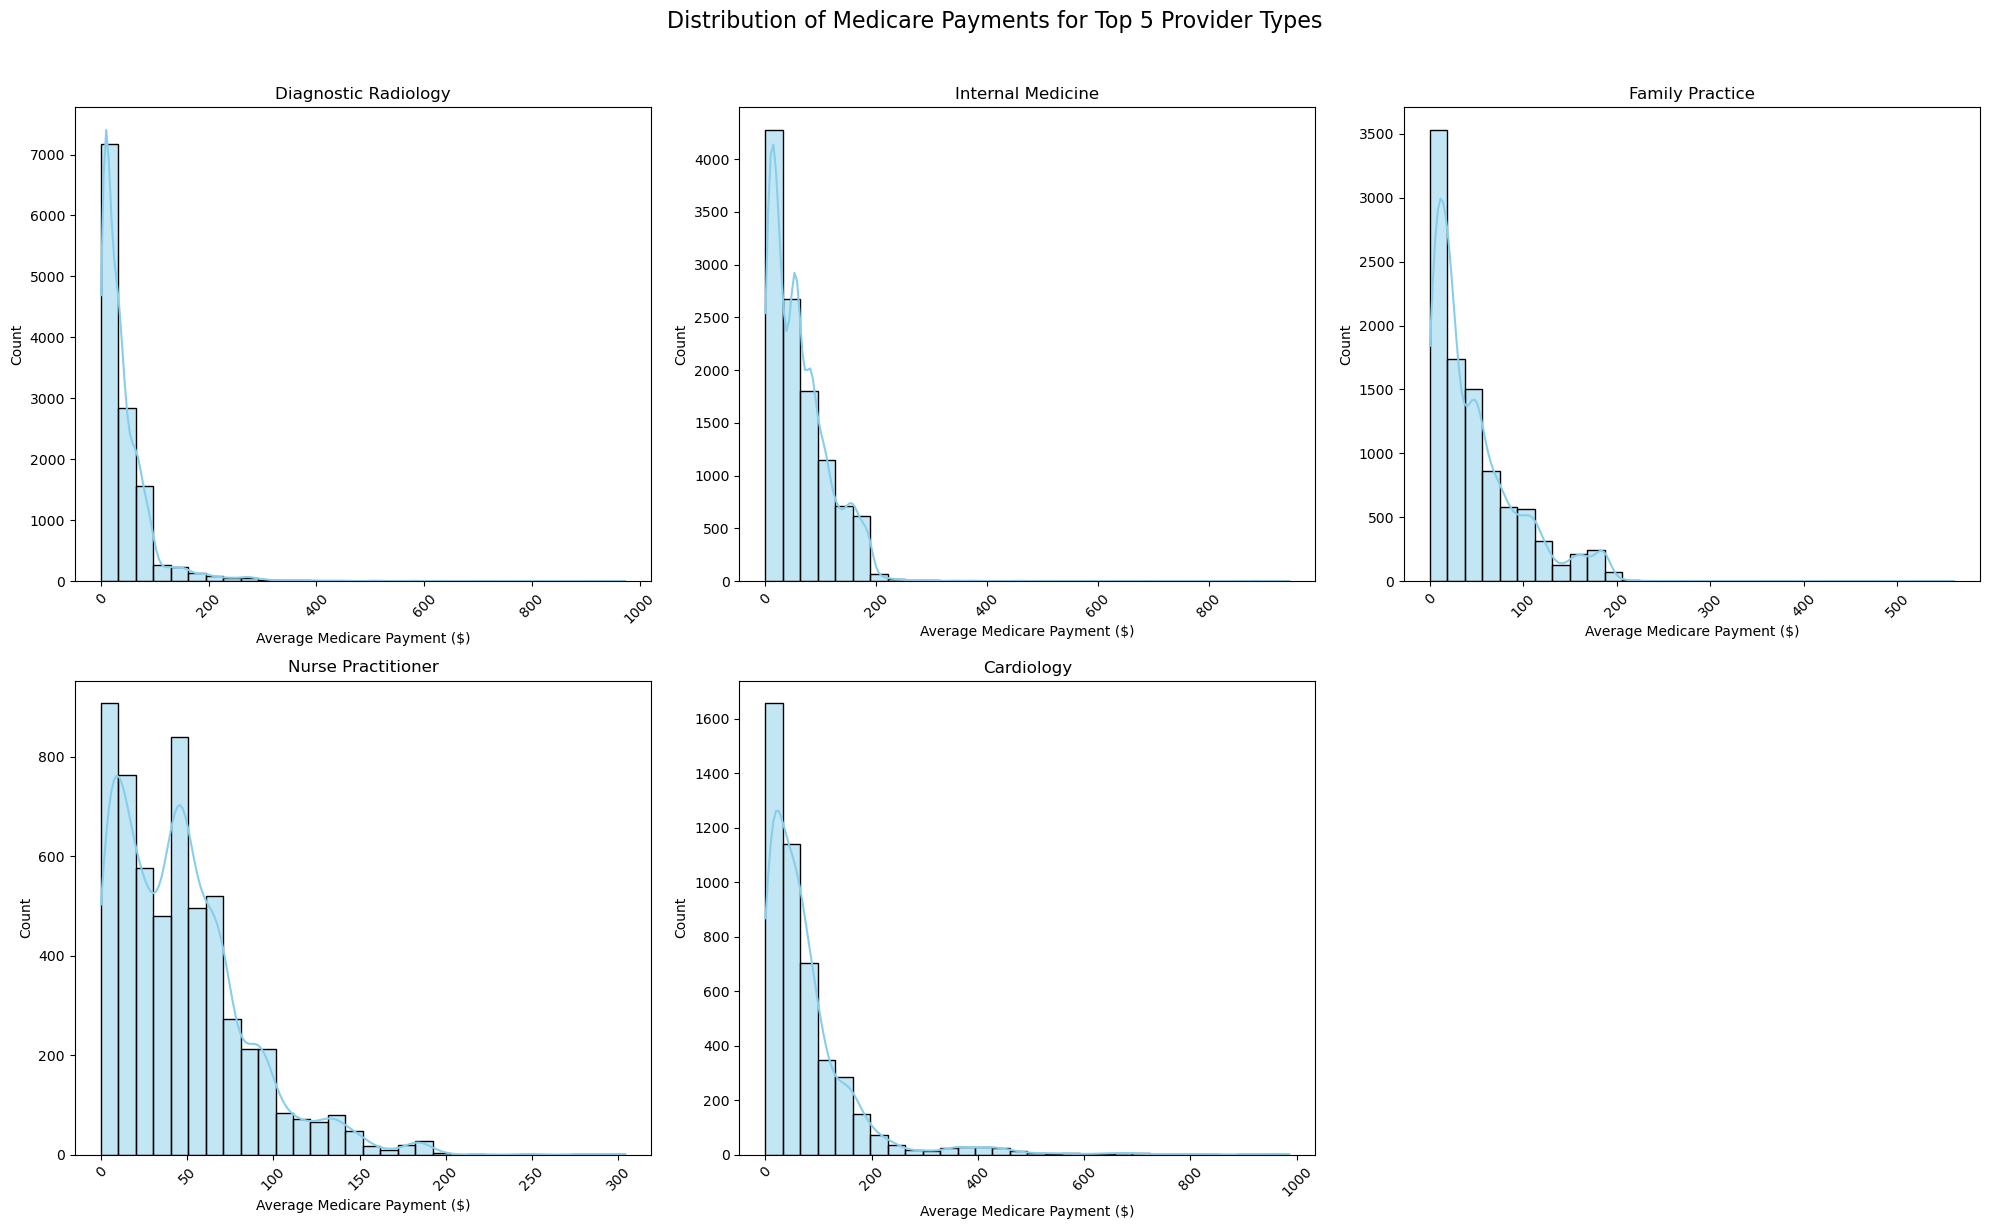


Summary Statistics for Top 5 Provider Types:
                      count   mean  median     std   min     max
Provider Type                                                   
Cardiology             4590  78.98   53.43  100.73  0.10  985.99
Diagnostic Radiology  12515  42.74   27.62   57.61  0.03  972.43
Family Practice        9760  47.34   29.93   46.55  0.01  560.29
Internal Medicine     11362  61.92   52.27   55.32  0.01  945.73
Nurse Practitioner     5713  46.35   42.60   37.32  0.02  303.77


In [47]:
top_5_providers = dataset['Provider Type'].value_counts().head(5).index

# Create figure with subplots (2 rows, 3 columns)
plt.figure(figsize=(20, 12))

# Create histogram for each of the 5 provider types
for idx, provider in enumerate(top_5_providers, 1):
    plt.subplot(2, 3, idx)
    
    # Filter data for current provider type
    provider_data = dataset[dataset['Provider Type'] == provider]
    
    # Create histogram with KDE
    sns.histplot(data=provider_data,
                x='Average Medicare Payment Amount',
                bins=30,
                kde=True,
                color='skyblue')
    
    plt.title(f'{provider}', fontsize=12)
    plt.xlabel('Average Medicare Payment ($)', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    
    # Format x-axis
    plt.ticklabel_format(style='plain', axis='x')
    plt.xticks(rotation=45)

plt.suptitle('Distribution of Medicare Payments for Top 5 Provider Types', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Print summary statistics for these 5 provider types
summary_stats = dataset[dataset['Provider Type'].isin(top_5_providers)].groupby('Provider Type')['Average Medicare Payment Amount'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
]).round(2)

print("\nSummary Statistics for Top 5 Provider Types:")
print(summary_stats)

In [100]:
# provider_types = dataset['Provider Type'].unique()
# num_providers = len(provider_types)
# rows = (num_providers + 2) // 3  # Calculate number of rows needed (3 plots per row)

# plt.figure(figsize=(20, 4*rows))

# # Create histogram for each provider type
# for idx, provider in enumerate(provider_types, 1):
#     plt.subplot(rows, 3, idx)
    
#     # Filter data for current provider type
#     provider_data = dataset[dataset['Provider Type'] == provider]
    
#     # Create histogram
#     sns.histplot(data=provider_data,
#                 x='Average Medicare Payment Amount',
#                 bins=30,
#                 kde=True)  # Add density curve
    
#     plt.title(f'{provider}', fontsize=10)
#     plt.xlabel('Average Medicare Payment ($)', fontsize=8)
#     plt.ylabel('Count', fontsize=8)
    
#     # Format x-axis for better readability
#     plt.ticklabel_format(style='plain', axis='x')
#     plt.xticks(rotation=45)

# plt.suptitle('Distribution of Medicare Payments by Provider Type', fontsize=16, y=1.02)
# plt.tight_layout()
# plt.show()

# # Print summary statistics for each provider type
# summary_stats = dataset.groupby('Provider Type')['Average Medicare Payment Amount'].agg([
#     'count',
#     'mean',
#     'median',
#     'std',
#     'min',
#     'max'
# ])
# print("\nSummary Statistics by Provider Type:")
# print(summary_stats)

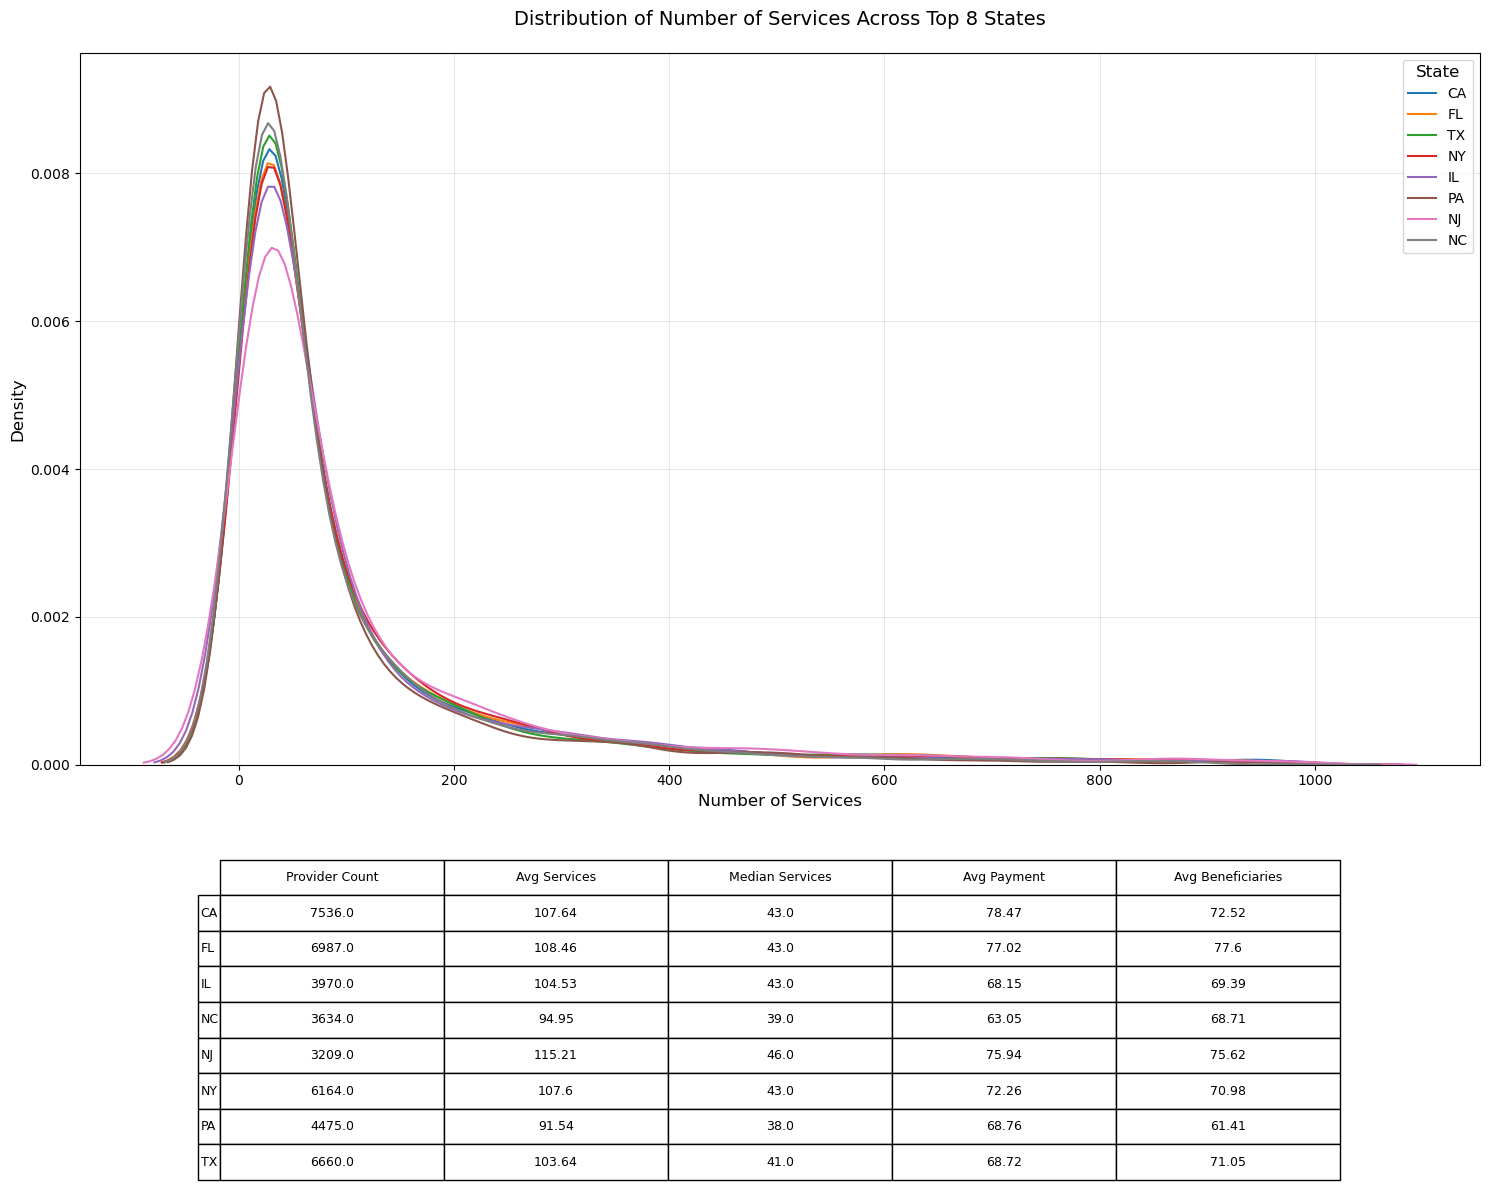


Detailed Statistical Analysis:

1. Service Volume Correlation:
Correlation between Services and Payment: -0.084

2. State Rankings by Average Services:
State Code of the Provider
NJ    115.206606
FL    108.457993
CA    107.635390
NY    107.603018
IL    104.531134
TX    103.638228
NC     94.953770
PA     91.535888
Name: Number of Services, dtype: float64

3. Variability Analysis:

Coefficient of Variation (%) by State:
State Code of the Provider
CA    148.82
FL    148.95
IL    149.54
NC    145.22
NJ    144.41
NY    146.38
PA    150.07
TX    149.59
dtype: float64


In [101]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), height_ratios=[2, 1])

top_states = dataset.groupby('State Code of the Provider')['Number of Services'].sum().nlargest(8).index
filtered_data = dataset[dataset['State Code of the Provider'].isin(top_states)]

# KDE for service costs by state
for state in top_states:
    state_data = filtered_data[filtered_data['State Code of the Provider'] == state]
    sns.kdeplot(data=state_data,
                x='Number of Services',
                label=state,
                ax=ax1)

ax1.set_title('Distribution of Number of Services Across Top 8 States', fontsize=14, pad=20)
ax1.set_xlabel('Number of Services', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(title='State', title_fontsize=12, fontsize=10)

# Calculating summary statistics
summary_stats = filtered_data.groupby('State Code of the Provider').agg({
    'Number of Services': ['count', 'mean', 'std', 'median', 'min', 'max'],
    'Average Medicare Payment Amount': ['mean', 'std'],
    'Number of Medicare Beneficiaries': 'mean'
}).round(2)

# Rename columns for clarity
summary_stats.columns = ['Provider Count', 'Avg Services', 'Std Services', 
                        'Median Services', 'Min Services', 'Max Services',
                        'Avg Payment', 'Std Payment', 'Avg Beneficiaries']

# Creating a table with statistics
table_data = summary_stats[['Provider Count', 'Avg Services', 'Median Services', 'Avg Payment', 'Avg Beneficiaries']]
table = ax2.table(cellText=table_data.values.round(2),
                 rowLabels=table_data.index,
                 colLabels=table_data.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0.1, 0.0, 0.8, 0.9])

# Formating table
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
ax2.axis('off')

plt.tight_layout()
plt.show()

print("\nDetailed Statistical Analysis:")
print("\n1. Service Volume Correlation:")
correlation = filtered_data[['Number of Services', 'Average Medicare Payment Amount']].corr()
print(f"Correlation between Services and Payment: {correlation.iloc[0,1]:.3f}")

print("\n2. State Rankings by Average Services:")
state_rankings = filtered_data.groupby('State Code of the Provider')['Number of Services'].mean().sort_values(ascending=False)
print(state_rankings)

print("\n3. Variability Analysis:")
variability = summary_stats['Std Services'] / summary_stats['Avg Services'] * 100
print("\nCoefficient of Variation (%) by State:")
print(variability.round(2))

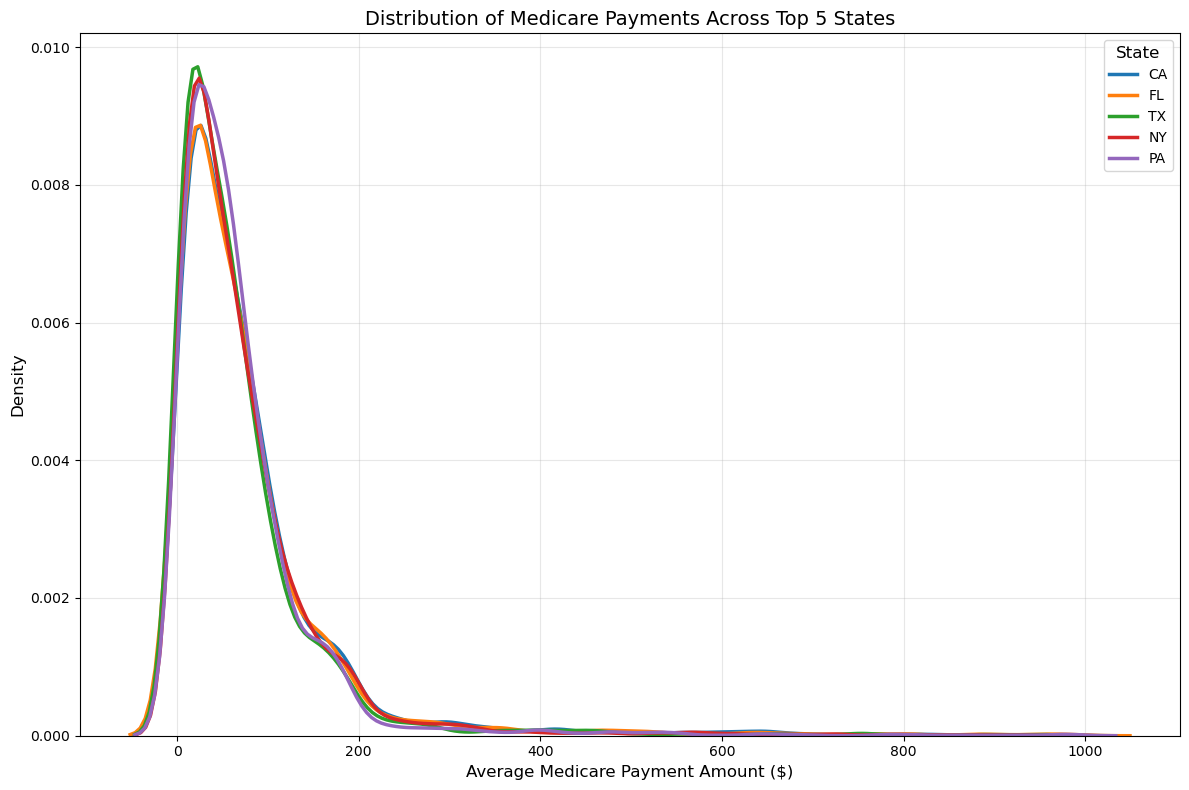


Payment Statistics for Top 5 States:
                            count   mean  median     std   min     max
State Code of the Provider                                            
CA                           7713  78.47   53.44   99.13  0.01  976.94
FL                           7217  77.02   51.59  102.23  0.02  997.58
NY                           6328  72.26   49.84   87.34  0.01  976.71
PA                           4548  68.76   49.53   83.95  0.07  987.05
TX                           6827  68.72   46.96   91.32  0.01  969.68

Number of Providers by State:
State Code of the Provider
CA    7775
FL    7263
TX    6861
NY    6361
PA    4561
Name: count, dtype: int64


In [102]:
top_5_states = dataset['State Code of the Provider'].value_counts().head(5).index

filtered_data = dataset[dataset['State Code of the Provider'].isin(top_5_states)]

plt.figure(figsize=(12, 8))

for state in top_5_states:
    state_data = filtered_data[filtered_data['State Code of the Provider'] == state]
    sns.kdeplot(data=state_data,
                x='Average Medicare Payment Amount',
                label=state,
                linewidth=2.5)

plt.title('Distribution of Medicare Payments Across Top 5 States', fontsize=14)
plt.xlabel('Average Medicare Payment Amount ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.grid(True, alpha=0.3)
plt.legend(title='State', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

summary_stats = filtered_data.groupby('State Code of the Provider')['Average Medicare Payment Amount'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    'max'
]).round(2)

print("\nPayment Statistics for Top 5 States:")
print(summary_stats)

provider_counts = filtered_data['State Code of the Provider'].value_counts()
print("\nNumber of Providers by State:")
print(provider_counts)

In [103]:
print("\nFinancial Metrics Summary by Provider Type:")
financial_summary = dataset.groupby('Provider Type').agg({
    'Average Submitted Charge Amount': ['mean', 'std', 'min', 'max'],
    'Average Medicare Payment Amount': ['mean', 'std', 'min', 'max'],
    'Charge_Payment_Ratio': 'mean'
}).round(2).head(5)

print(financial_summary)




Financial Metrics Summary by Provider Type:
                                                 Average Submitted Charge Amount  \
                                                                            mean   
Provider Type                                                                      
Addiction Medicine                                                        191.45   
Advanced Heart Failure and Transplant Cardiology                          109.00   
All Other Suppliers                                                        48.82   
Allergy/ Immunology                                                       110.91   
Ambulance Service Provider                                                430.26   

                                                                          \
                                                     std     min     max   
Provider Type                                                              
Addiction Medicine                                153.

# Anomaly Detection

# Outlier Providers 